# Q1：Karate Club

绘制空手道俱乐部的可视化图，展示网络的基本统计性质（度分布、集聚系数、 介数等）。

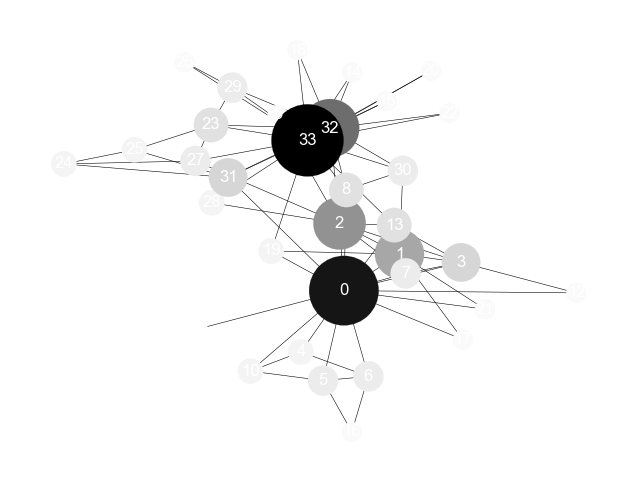

In [34]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

### 导入网络： 
g=nx.karate_club_graph()
fig,ax=plt.subplots(figsize=(8,6))
layout=[nx.shell_layout,
        nx.layout.circular_layout,
        nx.layout.fruchterman_reingold_layout,
        nx.layout.circular_layout,
        nx.layout.kamada_kawai_layout,
        nx.layout.spring_layout]
#nx提供了很多网络布局，可以方便使用
pos=layout[2](g)#根据布局方式生成每个节点的位置坐标
NodeId=list(g.nodes())
node_size = [g.degree(i)**1.2*90 for i in NodeId] 
options = {
    'node_size': node_size,
    'linewidths': 0.1,
    'width': 0.4,
    'style':'solid',
    'nodelist':NodeId,
    'node_color': node_size,
    'font_color':'w',
}
#option是一个控制绘图各种参数的字典变量

### 设置节点大小、颜色均与节点的度相关
nx.draw(g,pos=pos,ax=ax,with_labels=True,**options)#利用nx.draw函数可视化网络 
plt.show()



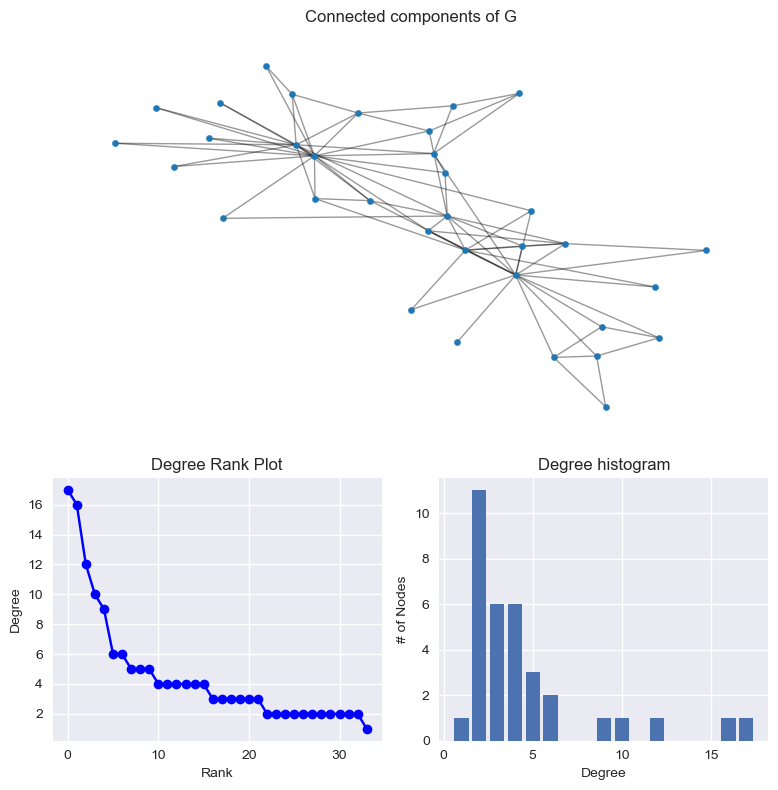

In [35]:
degree_sequence = sorted((d for n, d in g.degree()), reverse=True)
dmax = max(degree_sequence)
fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = g.subgraph(sorted(nx.connected_components(g), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of G")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

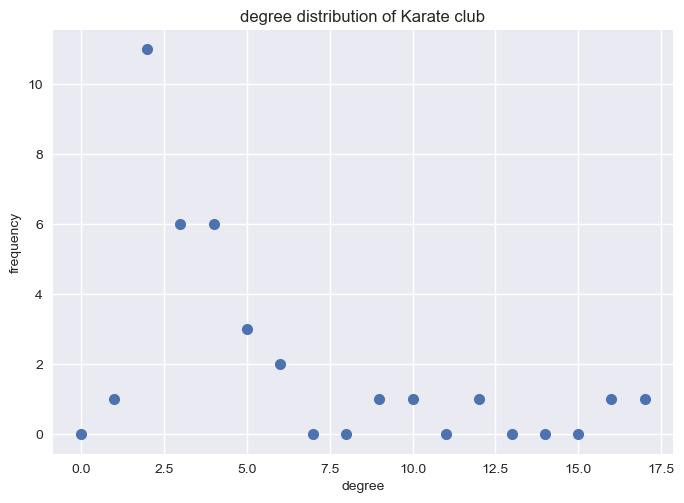

In [36]:
###网络的度分布：
## degree of each nodes
karate_dist = nx.degree_histogram(g)
#print deg_dist
# plt.style.use('seaborn')
karate_deg = dict(g.degree()).values()
plt.plot(range(0, len(karate_dist)), karate_dist, 'o',ms=8)
plt.xlabel('degree')
plt.ylabel('frequency')
plt.title("degree distribution of Karate club")
plt.show()


In [38]:
d0 = nx.average_shortest_path_length(g)
c0 = nx.average_clustering(g)
b0 = nx.betweenness_centrality(g)
print('平均最短路径： %.3f'%d0)
print('平均集聚系数： %.3f'%c0)
print('各个节点介数：')
for node, betweenness in b0.items():
    print(f'节点 {node+1}: {betweenness:.3f}')

平均最短路径： 2.408
平均集聚系数： 0.571
各个节点介数：
节点 1: 0.438
节点 2: 0.054
节点 3: 0.144
节点 4: 0.012
节点 5: 0.001
节点 6: 0.030
节点 7: 0.030
节点 8: 0.000
节点 9: 0.056
节点 10: 0.001
节点 11: 0.001
节点 12: 0.000
节点 13: 0.000
节点 14: 0.046
节点 15: 0.000
节点 16: 0.000
节点 17: 0.000
节点 18: 0.000
节点 19: 0.000
节点 20: 0.032
节点 21: 0.000
节点 22: 0.000
节点 23: 0.000
节点 24: 0.018
节点 25: 0.002
节点 26: 0.004
节点 27: 0.000
节点 28: 0.022
节点 29: 0.002
节点 30: 0.003
节点 31: 0.014
节点 32: 0.138
节点 33: 0.145
节点 34: 0.304


# Q2: ER random network
根据不同的N和P值生成ER随机网络，并且度量网络性质

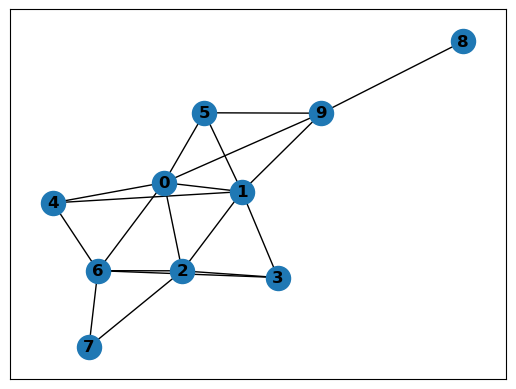

In [20]:
import networkx as nx
import matplotlib.pyplot as plt
n = 10
p = 0.5
g = nx.random_graphs.erdos_renyi_graph(n,p)  
#生成包含20个节点、以概率0.1连接的随机图        
nx.draw_networkx(g,node_size=300,with_labels=True, font_weight='bold') 
plt.show()


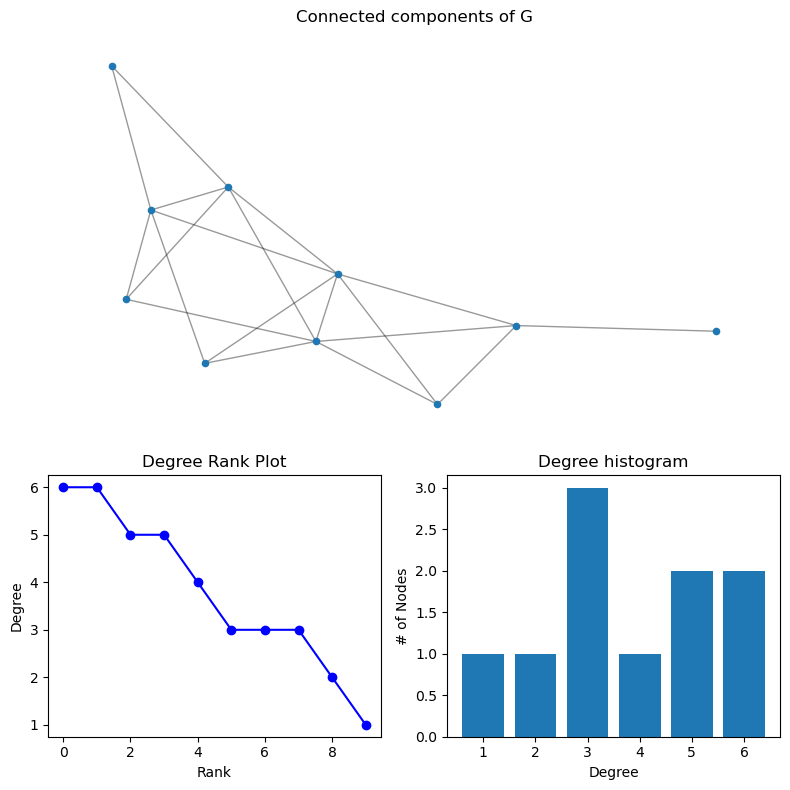

In [22]:
degree_sequence = sorted((d for n, d in g.degree()), reverse=True)
dmax = max(degree_sequence)
fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = g.subgraph(sorted(nx.connected_components(g), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of ER random network")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

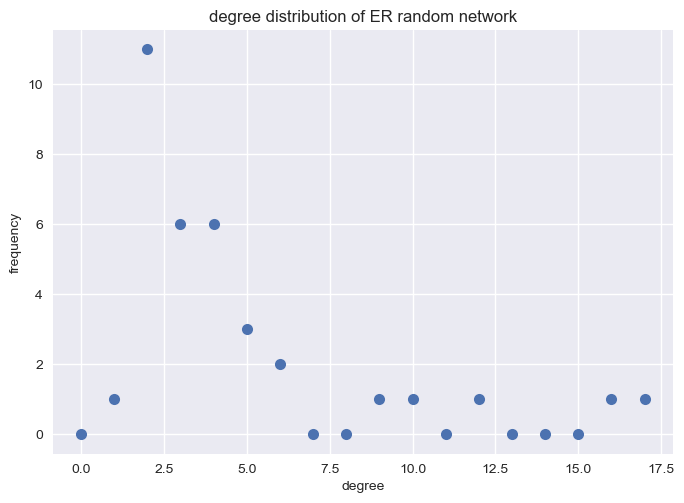

In [39]:
###网络的度分布：
## degree of each nodes
karate_dist = nx.degree_histogram(g)
#print deg_dist
# plt.style.use('seaborn')
karate_deg = dict(g.degree()).values()
plt.plot(range(0, len(karate_dist)), karate_dist, 'o',ms=8)
plt.xlabel('degree')
plt.ylabel('frequency')
plt.title("degree distribution of ER random network")
plt.show()


In [ ]:
d0 = nx.average_shortest_path_length(g)
c0 = nx.average_clustering(g)
b0 = nx.betweenness_centrality(g)
print('平均最短路径： %.3f'%d0)
print('平均集聚系数： %.3f'%c0)
print('各个节点介数：')
for node, betweenness in b0.items():
    print(f'节点 {node+1}: {betweenness:.3f}')